# NOTE:
The original notebook is from "Data-science-Final-Project"
https://github.com/oridarshan/Data-science-Final-Project

This notebook is an expantion to the original notebook, adding ensemble learning methods.

# Classification Notebook

Data analysis on: "Occupancy Detection Data Set"  
https://code.datasciencedojo.com/datasciencedojo/datasets/tree/master/Occupancy%20Detection
  
Goal: predict if the room is occupied based on enviromental sensors.

In [2]:
#libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#datasets
#the data is already splitted to tests and train set
test1_data=pd.DataFrame(pd.read_csv("Datasets/Occupancy Detection/datatest.csv"))
test2_data=pd.DataFrame(pd.read_csv("Datasets/Occupancy Detection/datatest2.csv"))
train_data=pd.DataFrame(pd.read_csv("Datasets/Occupancy Detection/datatraining.csv"))
train_data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/4/2015 17:51,23.18,27.2720,426.0,721.25,0.004793,1
1,2/4/2015 17:51,23.15,27.2675,429.5,714.00,0.004783,1
2,2/4/2015 17:53,23.15,27.2450,426.0,713.50,0.004779,1
3,2/4/2015 17:54,23.15,27.2000,426.0,708.25,0.004772,1
4,2/4/2015 17:55,23.10,27.2000,426.0,704.50,0.004757,1


## Data Exploration

### Atribures Explanation

date: Date & time in year-month-day hour:minute:second format

Temperature: Temperature in degree Celcius 

Humidity: Relative humidity in percentage

Light: Illuminance measurement in unit Lux (https://en.wikipedia.org/wiki/Lux)

CO2: CO2 in parts per million (ppm)

HumidityRatio: Humadity ratio-  Derived quantity from temperature and relative humidity, in kgwater-vapor/kg-air

Occupancy: Occupied or not- 1 for occupied and 0 for not occupied (target value)

In [3]:
train_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8143 entries, 0 to 8142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 445.4+ KB


In [4]:
test1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2665 non-null   object 
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio  2665 non-null   float64
 6   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 145.9+ KB


In [5]:
test2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9752 entries, 0 to 9751
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9752 non-null   object 
 1   Temperature    9752 non-null   float64
 2   Humidity       9752 non-null   float64
 3   Light          9752 non-null   float64
 4   CO2            9752 non-null   float64
 5   HumidityRatio  9752 non-null   float64
 6   Occupancy      9752 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 533.4+ KB


There are no null values.  

test2_data is too big (bigger than the train set) and the sets came seperated. I want to balance the train-test ratio and the data-spread between two sets (train and test).

First we combine all sets, remove exceptions and then split the data randomly.

In [6]:
comb_data=pd.concat([train_data,test1_data,test2_data],ignore_index=True)
comb_data

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/4/2015 17:51,23.180,27.2720,426.00,721.25,0.004793,1
1,2/4/2015 17:51,23.150,27.2675,429.50,714.00,0.004783,1
2,2/4/2015 17:53,23.150,27.2450,426.00,713.50,0.004779,1
3,2/4/2015 17:54,23.150,27.2000,426.00,708.25,0.004772,1
4,2/4/2015 17:55,23.100,27.2000,426.00,704.50,0.004757,1
...,...,...,...,...,...,...,...
20555,2/18/2015 9:15,20.815,27.7175,429.75,1505.25,0.004213,1
20556,2/18/2015 9:16,20.865,27.7450,423.50,1514.50,0.004230,1
20557,2/18/2015 9:16,20.890,27.7450,423.50,1521.50,0.004237,1
20558,2/18/2015 9:17,20.890,28.0225,418.75,1632.00,0.004279,1


making sure the trainset represents the testset:

In [7]:
comb_data.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


the attributes are not scaled, I will take care of that later.  
I will also dismiss the 'date' attribute, becuase working with dates is a headache.

Search for correletion:

<AxesSubplot:>

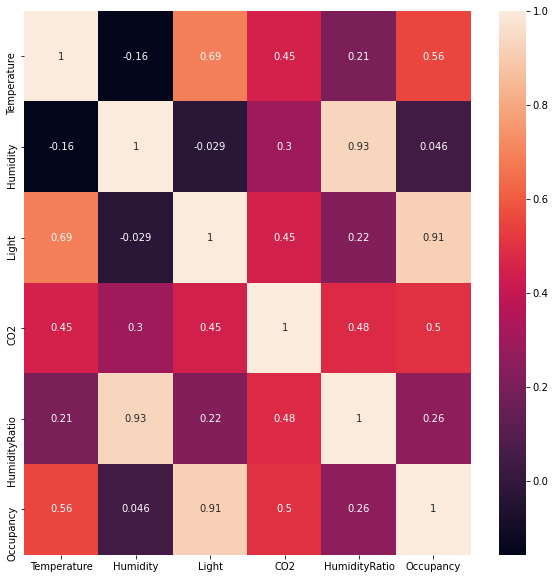

In [8]:
comb_data.drop('date', axis=1,inplace=True)
plt.figure(figsize=(10,10))
sns.heatmap(comb_data.corr(),annot=True)

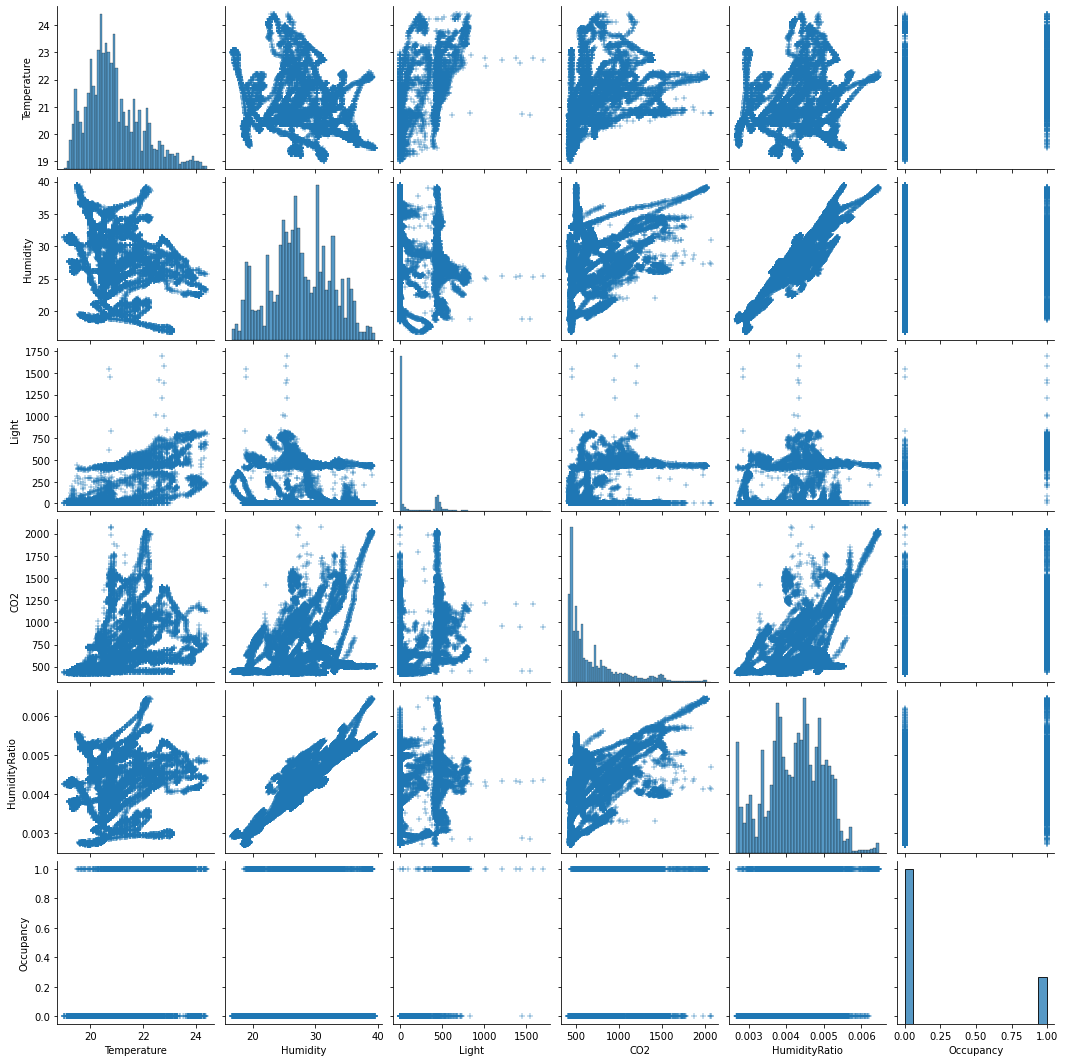

In [9]:
sns.pairplot(comb_data,markers='+')

In [10]:
comb_data.corr()['Occupancy'].sort_values(ascending=False)

Occupancy        1.000000
Light            0.914850
Temperature      0.555610
CO2              0.501582
HumidityRatio    0.257324
Humidity         0.046240
Name: Occupancy, dtype: float64

We notice right away that 'Light' has the highest correlation with Occupancy (Unlike me, these people remember to turn off the lights when they are out).  


Text(0.5, 1.0, 'Light to Occupancy')

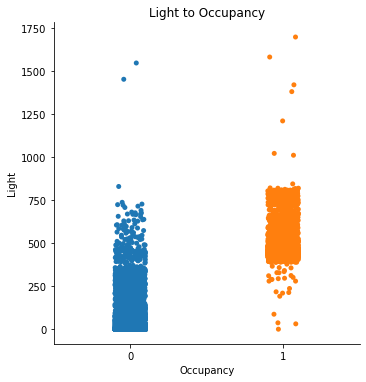

In [11]:
sns.catplot(x='Occupancy',y='Light',order=[0,1],data=comb_data)
plt.title('Light to Occupancy')

Text(0.5, 1.0, 'Light to Occupancy')

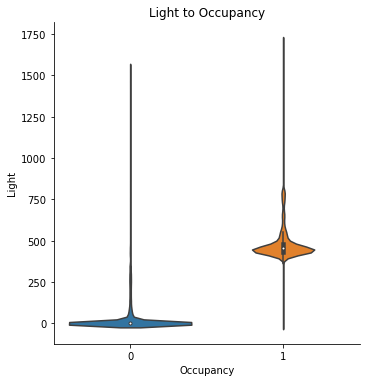

In [12]:
sns.catplot(x='Occupancy',y='Light',order=[0,1],data=comb_data,kind='violin')
plt.title('Light to Occupancy')

Text(0.5, 1.0, 'Light outliers detection')

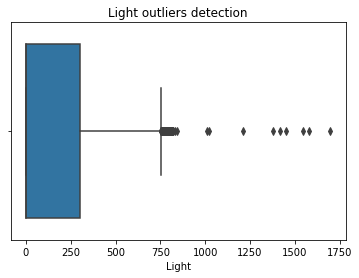

In [13]:
sns.boxplot(x=comb_data['Light'])
plt.title('Light outliers detection')

The first plot is a bit misguiding, there is a strong correlation between Light and Occupancy, The Light tend to be 0 when the room is empty.  
Maybe we will change that attribute to categorial.

There seem to be a few outliers we will need to clean up so they won't ruin our scaling.

Now for the tempreature and CO2 attributes:

Text(0.5, 1.0, 'Temperature to Occupancy')

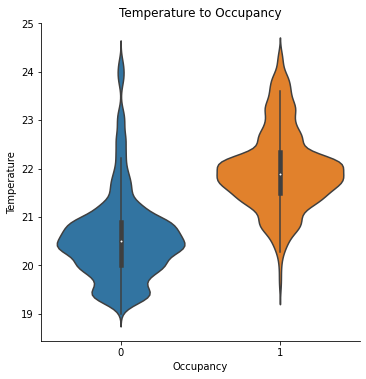

In [14]:
sns.catplot(x='Occupancy',y='Temperature',order=[0,1],data=comb_data,kind='violin')
plt.title('Temperature to Occupancy')

Text(0.5, 1.0, 'CO2 to Occupancy')

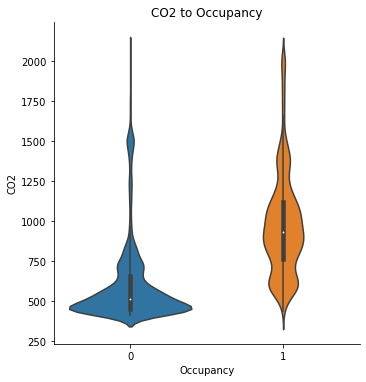

In [15]:
sns.catplot(x='Occupancy',y='CO2',order=[0,1],data=comb_data,kind='violin')
plt.title('CO2 to Occupancy')

Occupied rooms tend to be warmer and with higher CO2 rate.

Humidity and Humidity Ratio (derived quantity from temperature and relative humidity):

Text(0.5, 1.0, 'Humidity to Occupancy')

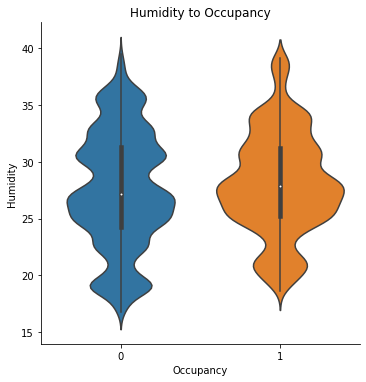

In [16]:
sns.catplot(x='Occupancy',y='Humidity',order=[0,1],data=comb_data,kind='violin')
plt.title('Humidity to Occupancy')

Text(0.5, 1.0, 'Humidity Ratio to Occupancy')

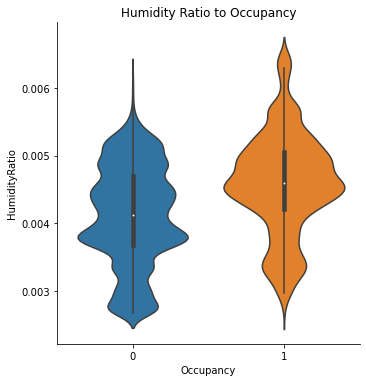

In [17]:
sns.catplot(x='Occupancy',y='HumidityRatio',order=[0,1],data=comb_data,kind='violin')
plt.title('Humidity Ratio to Occupancy')

There is very low correlation between Humidity and Occupancy.  
Slightly higher correlation between Humidity ratio to Occupancy.

In [18]:
comb_data.value_counts('Occupancy')

Occupancy
0    15810
1     4750
dtype: int64

The dataset is not balanced, dummy classifier will have high success rate.

## Data Preparations

Removeing outliers, train-test split, scailing data.

In [19]:
len(comb_data[comb_data['Light']>1000])#How many values above 1000

9

In [20]:
comb_data=comb_data[comb_data['Light']<1000]#remove outliers
comb_data.shape

(20551, 6)

The value of 'Light' is capped at 1000 (previously 1697.25)

In [21]:
comb_data.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000
mean,20.905621,27.657584,130.214528,690.467845,0.004228,0.230792
std,1.055027,4.982301,208.821449,311.180410,0.000768,0.421350
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.333333,0.004291,0.000000
75%,21.525000,31.290000,299.375000,804.500000,0.004832,0.000000
max,24.408333,39.500000,844.000000,2076.500000,0.006476,1.000000


To avoid polluting the data, I will split the data, scale the train set and then scale the test set with the same method.

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X=comb_data.drop('Occupancy',axis=1)#attributes
y=comb_data['Occupancy']#labels
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train

,Temperature,Humidity,Light,CO2,HumidityRatio
3298,20.000000,18.600000,0.000000,432.000000,0.002682
18157,22.000000,29.926667,433.000000,982.000000,0.004897
18023,21.700000,28.890000,462.333333,901.333333,0.004639
12304,22.600000,25.700000,58.000000,540.000000,0.004358
18656,20.000000,30.290000,0.000000,711.000000,0.004379
...,...,...,...,...,...
11289,20.500000,28.160000,0.000000,484.666667,0.004198
11972,23.175000,23.100000,683.500000,842.000000,0.004054
5392,19.100000,31.033333,31.000000,432.000000,0.004242
860,21.033333,23.666667,419.000000,602.333333,0.003643


In [23]:
scaler=MinMaxScaler()
scaler.fit(X_train)
scaler.scale_ #relative scaling of the data. Equivalent to (max - min) / (X.max(axis=0) - X.min(axis=0))

array([1.85528757e-01, 4.39463854e-02, 1.20627262e-03, 6.01142170e-04,
       2.63288084e+02])

In [24]:
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)
X_train.max()#new min-max values

1.0

In [25]:
X_train

array([[0.18552876, 0.08152054, 0.        , 0.0114217 , 0.00103077],
       [0.55658627, 0.5792866 , 0.52231604, 0.34204989, 0.58417965],
       [0.50092764, 0.53372885, 0.55770004, 0.29355776, 0.5164251 ],
       ...,
       [0.01855288, 0.6279206 , 0.03739445, 0.0114217 , 0.41170595],
       [0.37724181, 0.30418223, 0.50542823, 0.11381625, 0.25398691],
       [0.17532468, 0.78026807, 0.        , 0.07514277, 0.6049594 ]])

## KNN Classification

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV    


In [27]:
#searching for best parameters (in this case 'k') for the algorithem using CV
knn=KNeighborsClassifier()
k_range = list(range(1, 13))#'k' values
k_num={'n_neighbors':k_range}
#I used 'f1' score, because.
grid = GridSearchCV(knn, k_num, cv=10, scoring='f1')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                         12]},
             scoring='f1')

In [28]:
#plotting the results
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024320,0.002927,0.037493,0.000925,1,{'n_neighbors': 1},0.985430,0.993395,0.990802,0.982827,0.996068,0.984169,0.985621,0.980289,0.981818,0.988296,0.986872,0.004907,1
1,0.024324,0.002531,0.037969,0.001431,2,{'n_neighbors': 2},0.981333,0.992042,0.986772,0.978723,0.992084,0.984043,0.980185,0.978836,0.988173,0.988204,0.985040,0.004880,3
2,0.023817,0.002155,0.037973,0.000823,3,{'n_neighbors': 3},0.980237,0.992084,0.989556,0.978947,0.993430,0.989446,0.982962,0.984334,0.983139,0.985696,0.985983,0.004690,2
3,0.024020,0.003102,0.038621,0.000405,4,{'n_neighbors': 4},0.978892,0.992063,0.988204,0.980237,0.989446,0.986737,0.978947,0.981627,0.983095,0.984334,0.984358,0.004369,5
4,0.023822,0.001912,0.039566,0.000998,5,{'n_neighbors': 5},0.981627,0.994723,0.985658,0.980392,0.990802,0.989501,0.976440,0.981723,0.983182,0.978008,0.984206,0.005580,7
5,0.023820,0.002419,0.039369,0.000669,6,{'n_neighbors': 6},0.977543,0.994723,0.982962,0.981675,0.989474,0.988142,0.976378,0.980341,0.985733,0.983051,0.984002,0.005345,8
6,0.023520,0.002005,0.041064,0.001315,7,{'n_neighbors': 7},0.980237,0.993412,0.983139,0.979275,0.989474,0.990826,0.979167,0.985696,0.984496,0.981865,0.984759,0.004771,4
7,0.024700,0.002027,0.040473,0.000665,8,{'n_neighbors': 8},0.978892,0.994723,0.981771,0.976623,0.989474,0.990826,0.980443,0.984375,0.984456,0.980494,0.984208,0.005494,6
8,0.023723,0.002266,0.040930,0.001304,9,{'n_neighbors': 9},0.980289,0.992105,0.979221,0.977951,0.988235,0.989529,0.977893,0.984416,0.981959,0.978065,0.982966,0.005036,9
9,0.024009,0.002450,0.041276,0.000921,10,{'n_neighbors': 10},0.980289,0.990777,0.979221,0.977951,0.988235,0.989501,0.975228,0.984416,0.983226,0.976744,0.982559,0.005262,11


<AxesSubplot:xlabel='param_n_neighbors', ylabel='mean f1 score'>

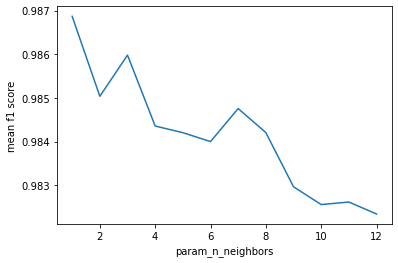

In [29]:
#I only need 'mean score' 'param_n_neighbors'
k_compare=pd.DataFrame(grid.cv_results_)[['mean_test_score','param_n_neighbors']]
k_compare.plot(y='mean_test_score',x='param_n_neighbors',legend=False,ylabel='mean f1 score')

The score seem to drop for higher 'k', let's test further.

In [30]:
#testing the scoring parameter
k_range = list(range(1, 6))
weight = ['uniform', 'distance']
param_grid = {'n_neighbors':k_range, 'weights':weight}
grid = GridSearchCV(knn, param_grid, cv=10, scoring='f1')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [31]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024977,0.004019,0.037084,0.000751,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.985430,0.993395,0.990802,0.982827,0.996068,0.984169,0.985621,0.980289,0.981818,0.988296,0.986872,0.004907,1
1,0.024191,0.002341,0.007380,0.000493,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.985430,0.993395,0.990802,0.982827,0.996068,0.984169,0.985621,0.980289,0.981818,0.988296,0.986872,0.004907,1
2,0.024623,0.002791,0.038469,0.001260,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",0.981333,0.992042,0.986772,0.978723,0.992084,0.984043,0.980185,0.978836,0.988173,0.988204,0.985040,0.004880,8
3,0.023621,0.002484,0.007974,0.000446,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",0.985430,0.993395,0.990802,0.982827,0.996068,0.984169,0.985621,0.980289,0.981818,0.988296,0.986872,0.004907,1
4,0.023920,0.002229,0.038373,0.001281,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.980237,0.992084,0.989556,0.978947,0.993430,0.989446,0.982962,0.984334,0.983139,0.985696,0.985983,0.004690,6
5,0.023421,0.001956,0.008672,0.000638,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.978892,0.992084,0.990850,0.980237,0.996058,0.986807,0.984293,0.981627,0.984416,0.985696,0.986096,0.005202,5
6,0.023717,0.002030,0.038875,0.001104,4,uniform,"{'n_neighbors': 4, 'weights': 'uniform'}",0.978892,0.992063,0.988204,0.980237,0.989446,0.986737,0.978947,0.981627,0.983095,0.984334,0.984358,0.004369,9
7,0.023618,0.002138,0.008874,0.000538,4,distance,"{'n_neighbors': 4, 'weights': 'distance'}",0.980237,0.992084,0.989529,0.980237,0.997375,0.988111,0.983007,0.984293,0.984416,0.985733,0.986502,0.005115,4
8,0.024071,0.002358,0.038771,0.000537,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.981627,0.994723,0.985658,0.980392,0.990802,0.989501,0.976440,0.981723,0.983182,0.978008,0.984206,0.005580,10
9,0.023816,0.002417,0.008979,0.000777,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.980289,0.993395,0.990826,0.981627,0.992126,0.988142,0.979058,0.983007,0.984456,0.980545,0.985347,0.005068,7


<AxesSubplot:xlabel='param_n_neighbors', ylabel='mean_test_score'>

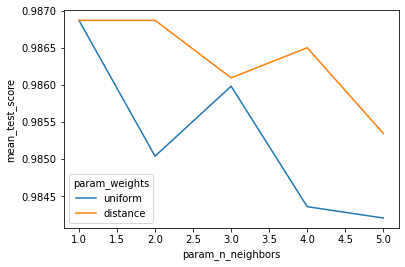

In [32]:

k_compare2=pd.DataFrame(grid.cv_results_)[['mean_test_score','param_n_neighbors','param_weights']]

sns.lineplot(data=k_compare2,y='mean_test_score',x='param_n_neighbors',hue='param_weights')

'distance' method is overall better than 'unifirm' method but there is no differance for k=1 (of course).

In [33]:
#Final algorithem
final=grid.best_estimator_
test_pred=final.predict(X_test)
test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Final scores:

In [34]:
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, confusion_matrix
print ('f1 score: ' +str(f1_score(y_test,test_pred)))
print ('accuracy: ' +str(accuracy_score(y_test,test_pred)))
print ('precision: ' +str(precision_score(y_test,test_pred)))
print ('recall: ' +str(recall_score(y_test,test_pred)))
print('confusion matrix: ')
print(confusion_matrix(y_test,test_pred))


f1 score: 0.9839743589743589
accuracy: 0.9927025054731209
precision: 0.9850267379679144
recall: 0.9829242262540021
confusion matrix: 
[[3160   14]
 [  16  921]]


## Decision Tree

In this classifier, I will try different 'min_samples_leaf' values.  
'min_samples_leaf' represents the number of samples that the classifier will not split further but rather declare as 'leaf'.

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=42)#to get consistent results
min_leaf={'min_samples_leaf':[2,3,4,5,6,7,8,9,10,11]}#different parameters to avoid overfitting
#this time I will use the 'precision’ scoring method
grid = GridSearchCV(dtc, min_leaf, cv=10, scoring='precision')
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]},
             scoring='precision')

In [36]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.030839,0.003790,0.001101,0.000298,2,{'min_samples_leaf': 2},0.981481,0.989130,0.989305,0.978723,0.986842,0.991935,0.973684,0.979112,0.971279,0.973958,0.981545,0.007017,2
1,0.029397,0.002829,0.001000,0.000004,3,{'min_samples_leaf': 3},0.986807,0.991914,0.976440,0.976562,0.984375,0.989362,0.966057,0.973958,0.966495,0.961340,0.977331,0.010049,6
2,0.029503,0.002860,0.001495,0.000499,4,{'min_samples_leaf': 4},0.983957,0.997312,0.981481,0.981627,0.986877,0.992021,0.973545,0.976562,0.971503,0.971354,0.981624,0.008283,1
3,0.029956,0.003842,0.001285,0.000442,5,{'min_samples_leaf': 5},0.976253,0.997340,0.978947,0.976623,0.986979,0.992042,0.973822,0.979167,0.966837,0.971503,0.979951,0.008974,3
4,0.029131,0.002897,0.001392,0.000490,6,{'min_samples_leaf': 6},0.976440,0.992000,0.978947,0.971649,0.984416,0.992042,0.973958,0.976623,0.974026,0.966495,0.978660,0.008000,4
5,0.028403,0.002453,0.001197,0.000401,7,{'min_samples_leaf': 7},0.974026,0.992063,0.979003,0.968912,0.984375,0.989474,0.971503,0.971649,0.971722,0.966581,0.976931,0.008428,7
6,0.028002,0.002724,0.001200,0.000396,8,{'min_samples_leaf': 8},0.976562,0.992063,0.981579,0.966408,0.981818,0.989474,0.969072,0.976684,0.974160,0.966667,0.977449,0.008455,5
7,0.028105,0.002787,0.001389,0.000484,9,{'min_samples_leaf': 9},0.976253,0.989474,0.974093,0.963824,0.979328,0.989446,0.966495,0.971649,0.964467,0.966581,0.974161,0.009069,9
8,0.027894,0.002688,0.001398,0.000488,10,{'min_samples_leaf': 10},0.976440,0.994709,0.971576,0.963824,0.979328,0.989501,0.966495,0.971576,0.964467,0.966581,0.974450,0.010095,8
9,0.027421,0.002543,0.001588,0.000483,11,{'min_samples_leaf': 11},0.976562,0.994695,0.964103,0.963918,0.979328,0.992126,0.966321,0.971649,0.964377,0.966495,0.973957,0.010976,10


<AxesSubplot:xlabel='param_min_samples_leaf', ylabel='mean_test_score'>

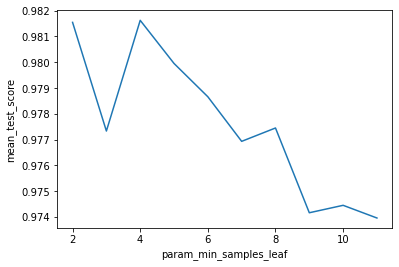

In [37]:
min_leaf_eval=pd.DataFrame(grid.cv_results_)[['param_min_samples_leaf','mean_test_score']]
sns.lineplot(data=min_leaf_eval,x='param_min_samples_leaf',y='mean_test_score')

The optimal value for 'min_sample_leaf' is 4.

test scores:

In [38]:
final2=grid.best_estimator_
test_pred2=final2.predict(X_test)
print ('f1 score: ' +str(f1_score(y_test,test_pred2)))
print ('accuracy: ' +str(accuracy_score(y_test,test_pred2)))
print ('precision: ' +str(precision_score(y_test,test_pred2)))
print ('recall: ' +str(recall_score(y_test,test_pred2)))
print('confusion matrix: ')
print(confusion_matrix(y_test,test_pred2))

f1 score: 0.9769683985002677
accuracy: 0.9895402578448066
precision: 0.9806451612903225
recall: 0.9733191035218783
confusion matrix: 
[[3156   18]
 [  25  912]]


# Extensions:

## Linear Regression

We add Linear regression estimator in order to use voting ensemble method.

In [39]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(random_state=42).fit(X_train,y_train)
test_pred3=lrc.predict(X_test)
print ('f1 score: ' +str(f1_score(y_test,test_pred3)))
print ('accuracy: ' +str(accuracy_score(y_test,test_pred3)))
print ('precision: ' +str(precision_score(y_test,test_pred3)))
print ('recall: ' +str(recall_score(y_test,test_pred3)))
print('confusion matrix: ')
print(confusion_matrix(y_test,test_pred3))

f1 score: 0.9749216300940439
accuracy: 0.9883240087569934
precision: 0.95496417604913
recall: 0.9957310565635006
confusion matrix: 
[[3130   44]
 [   4  933]]


## Voting Classifier

We combine the results from the "simple" classifiers using different voting methods.

In [40]:
from sklearn.ensemble import VotingClassifier
vtc = VotingClassifier(estimators=[('knn',knn),('dtc',dtc),('lrc',lrc)], voting = 'hard')
vtc.fit(X_train,y_train)
hard_voting_pred=vtc.predict(X_test)
print("f1 score: " + str(f1_score(y_test,hard_voting_pred)))

f1 score: 0.983104540654699


In [41]:
vtc.voting='soft'
vtc.fit(X_train,y_train)
soft_voting_pred=vtc.predict(X_test)
print("f1 score: " + str(f1_score(y_test,soft_voting_pred)))


f1 score: 0.9841269841269841


In [42]:
print ('knn f1 score: ' +str(f1_score(y_test,test_pred)))
print ('decision tree f1 score: ' +str(f1_score(y_test,test_pred2)))
print ('linear regression f1 score: ' +str(f1_score(y_test,test_pred3)))

print("\nHard voting f1 score: " + str(f1_score(y_test,hard_voting_pred)))
print("Soft voting f1 score: " + str(f1_score(y_test,soft_voting_pred)))

knn f1 score: 0.9839743589743589
decision tree f1 score: 0.9769683985002677
linear regression f1 score: 0.9749216300940439

Hard voting f1 score: 0.983104540654699
Soft voting f1 score: 0.9841269841269841


### Note that the soft-voting method gave us better results than any of the estimators gave by himself.

## ADA Boost

In [43]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=75, random_state=42)
learning_rates={'learning_rate':[0.8,0.9,0.95,1,1.05,1.1,1.2]} # try different learning rates using cross-validation/
grid = GridSearchCV(abc, learning_rates, cv=10, scoring='f1')
grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(n_estimators=75, random_state=42),
             param_grid={'learning_rate': [0.8, 0.9, 0.95, 1, 1.05, 1.1, 1.2]},
             scoring='f1')

In [44]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.560961,0.009623,0.017143,0.000399,0.8,{'learning_rate': 0.8},0.980545,0.985621,0.971649,0.978008,0.983139,0.986945,0.966581,0.980645,0.976864,0.975610,0.978561,0.005938,3
1,0.559192,0.002588,0.017434,0.000495,0.9,{'learning_rate': 0.9},0.981865,0.985621,0.971649,0.978008,0.983139,0.986945,0.966581,0.980645,0.978121,0.974359,0.978693,0.006047,1
2,0.558201,0.004740,0.017347,0.000657,0.95,{'learning_rate': 0.95},0.980545,0.985621,0.971649,0.976684,0.984456,0.985621,0.966581,0.980645,0.976864,0.974359,0.978302,0.005978,6
3,0.560449,0.002548,0.017148,0.000399,1,{'learning_rate': 1},0.981865,0.985621,0.971649,0.976684,0.984456,0.985621,0.966581,0.980645,0.976864,0.974359,0.978435,0.006041,4
4,0.560687,0.001458,0.017343,0.000488,1.05,{'learning_rate': 1.05},0.980545,0.985621,0.971649,0.978008,0.983139,0.985621,0.966581,0.980645,0.976864,0.975610,0.978428,0.005761,5
5,0.561458,0.002762,0.017450,0.000496,1.1,{'learning_rate': 1.1},0.979221,0.981627,0.971649,0.976684,0.984456,0.986911,0.967908,0.980645,0.978121,0.974359,0.978158,0.005474,7
6,0.556824,0.003450,0.017248,0.000454,1.2,{'learning_rate': 1.2},0.981865,0.985621,0.971649,0.976684,0.984456,0.986877,0.966581,0.979328,0.978121,0.975610,0.978679,0.006073,2


<AxesSubplot:xlabel='param_learning_rate', ylabel='mean_test_score'>

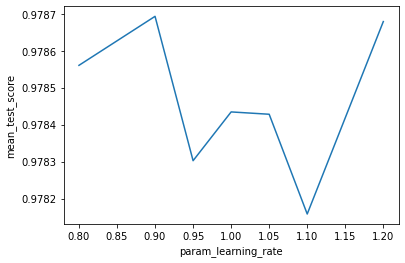

In [45]:
learning_rate_eval=pd.DataFrame(grid.cv_results_)[['param_learning_rate','mean_test_score']]
sns.lineplot(data=learning_rate_eval,x='param_learning_rate',y='mean_test_score')

In [46]:
learning_rates={'learning_rate':[0.8,1.2,1.25,1.3,1.35]}
grid = GridSearchCV(abc, learning_rates, cv=10, scoring='f1')
grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(n_estimators=75, random_state=42),
             param_grid={'learning_rate': [0.8, 1.2, 1.25, 1.3, 1.35]},
             scoring='f1')

<AxesSubplot:xlabel='param_learning_rate', ylabel='mean_test_score'>

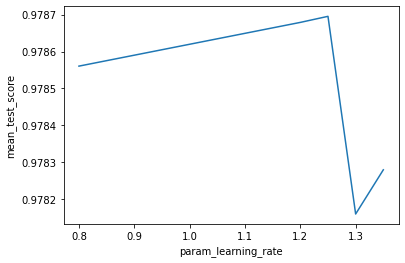

In [47]:
learning_rate_eval=pd.DataFrame(grid.cv_results_)[['param_learning_rate','mean_test_score']]
sns.lineplot(data=learning_rate_eval,x='param_learning_rate',y='mean_test_score')

The best learning rate is 1.25.

### different n-estimators combinations:

In [48]:
abc=grid.best_estimator_
grid = GridSearchCV(abc, {'n_estimators':[50,75,100,125]}, cv=10, scoring='f1')
grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(learning_rate=1.25, n_estimators=75,
                                          random_state=42),
             param_grid={'n_estimators': [50, 75, 100, 125]}, scoring='f1')

<AxesSubplot:xlabel='param_n_estimators', ylabel='mean_test_score'>

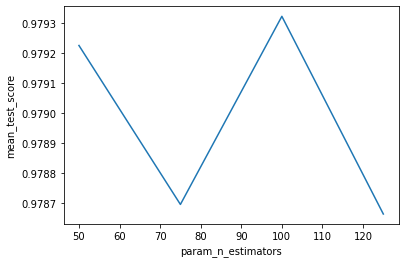

In [49]:
n_estimators_eval=pd.DataFrame(grid.cv_results_)[['param_n_estimators','mean_test_score']]
sns.lineplot(data=n_estimators_eval,x='param_n_estimators',y='mean_test_score')

### best combination is {learning_rate=1.25, n_estimators=100}

In [50]:
abc=grid.best_estimator_
ada_pred1=abc.predict(X_test)
print("Ada Boost f1 score: " + str(f1_score(y_test,ada_pred1)))

Ada Boost f1 score: 0.9737670514165793


### Even thogh Ada Boost classifier is more advanced, it performs slightly worse than the 'simple' estimators as knn and decision tree.

## Second try: starting with n_estimators and then adjusting learning_rate.

In [51]:
abc.learning_rate = 1 # reset learning rate
grid = GridSearchCV(abc, {'n_estimators':[60,70,80,90,100,110,120,130,140]}, cv=5, scoring='f1')
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(learning_rate=1, n_estimators=100,
                                          random_state=42),
             param_grid={'n_estimators': [60, 70, 80, 90, 100, 110, 120, 130,
                                          140]},
             scoring='f1')

<AxesSubplot:xlabel='param_n_estimators', ylabel='mean_test_score'>

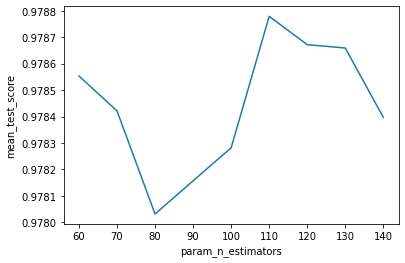

In [52]:
n_estimators_eval=pd.DataFrame(grid.cv_results_)[['param_n_estimators','mean_test_score']]
sns.lineplot(data=n_estimators_eval,x='param_n_estimators',y='mean_test_score')

The ideal n_estimators is 110. Mow we will try to adjust the learning rate.

In [53]:
abc=grid.best_estimator_
grid = GridSearchCV(abc, {'learning_rate':[0.8,0.9,0.95,1,1.05,1.1,1.2]}, cv=10, scoring='f1')
grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(learning_rate=1, n_estimators=110,
                                          random_state=42),
             param_grid={'learning_rate': [0.8, 0.9, 0.95, 1, 1.05, 1.1, 1.2]},
             scoring='f1')

Text(0.5, 1.0, '110 estimators')

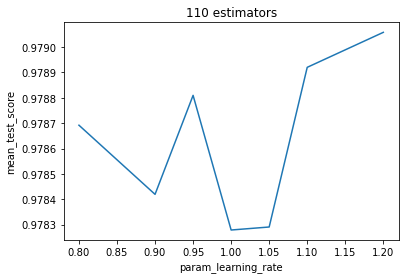

In [54]:
learning_rate_eval=pd.DataFrame(grid.cv_results_)[['param_learning_rate','mean_test_score']]
sns.lineplot(data=learning_rate_eval,x='param_learning_rate',y='mean_test_score').set_title('110 estimators')

The graph seem to rise as the learning rate goes up, we will check more options.

In [55]:
grid = GridSearchCV(abc, {'learning_rate':[1.2,1.3,1.4,1.5,1.6]}, cv=10, scoring='f1')
grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(learning_rate=1, n_estimators=110,
                                          random_state=42),
             param_grid={'learning_rate': [1.2, 1.3, 1.4, 1.5, 1.6]},
             scoring='f1')

Text(0.5, 1.0, '110 estimators')

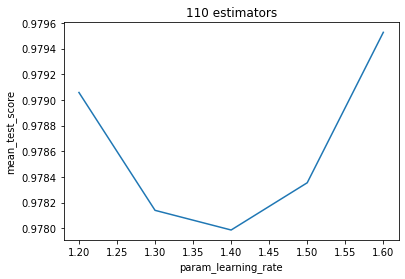

In [56]:
learning_rate_eval=pd.DataFrame(grid.cv_results_)[['param_learning_rate','mean_test_score']]
sns.lineplot(data=learning_rate_eval,x='param_learning_rate',y='mean_test_score').set_title('110 estimators')

In [57]:
grid = GridSearchCV(abc, {'learning_rate':[1.6,1.7,1.8,1.9]}, cv=10, scoring='f1')
grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(learning_rate=1, n_estimators=110,
                                          random_state=42),
             param_grid={'learning_rate': [1.6, 1.7, 1.8, 1.9]}, scoring='f1')

Text(0.5, 1.0, '140 estimators')

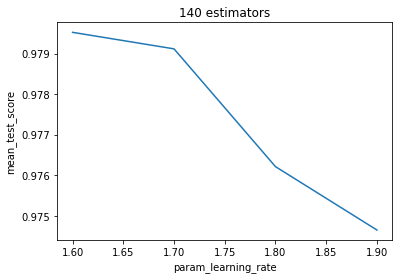

In [58]:
learning_rate_eval=pd.DataFrame(grid.cv_results_)[['param_learning_rate','mean_test_score']]
sns.lineplot(data=learning_rate_eval,x='param_learning_rate',y='mean_test_score').set_title('140 estimators')

### ideal combination: {n_estimators=110, learning rate=1.6}

In [59]:
abc=grid.best_estimator_
ada_pred2=abc.predict(X_test)
print("Ada Boost 2 f1 score: " + str(f1_score(y_test,ada_pred2)))

Ada Boost 2 f1 score: 0.9758403361344538


### We improved the results slightly. still worse than knn.

## 'vanila' AdaBoost: 
for refrence purposes

In [60]:
abc=AdaBoostClassifier()
abc.fit(X_train, y_train)
van_pred= abc.predict(X_test)
print ("vanilla AdaBoost f1 score: " + str(f1_score(y_test,van_pred)))

vanilla AdaBoost f1 score: 0.97325642370215


lower than the adjusted classifiers.

## Clustering + vanilla AdaBoost
We will use k-means clustering algorithem to divide the data to groups, each occurrence's cluster will be added as additional information.
these technic will allow us to recognize "blocks" of data' which we believe will have the same labels.

In [93]:
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=6, random_state=42).fit(X_train)#6 clusters (6 center points)
kmeans.labels_

array([0, 4, 4, ..., 5, 4, 5])

In [94]:
copy=X_train.copy()
labels=kmeans.labels_/6 # normalized labels
X_labels=np.insert(copy, 0, labels, axis=1)#add the labels (clusters) to the data
X_labels

array([[0.        , 0.18552876, 0.08152054, 0.        , 0.0114217 ,
        0.00103077],
       [0.66666667, 0.55658627, 0.5792866 , 0.52231604, 0.34204989,
        0.58417965],
       [0.66666667, 0.50092764, 0.53372885, 0.55770004, 0.29355776,
        0.5164251 ],
       ...,
       [0.83333333, 0.01855288, 0.6279206 , 0.03739445, 0.0114217 ,
        0.41170595],
       [0.66666667, 0.37724181, 0.30418223, 0.50542823, 0.11381625,
        0.25398691],
       [0.83333333, 0.17532468, 0.78026807, 0.        , 0.07514277,
        0.6049594 ]])

In [95]:
abc.fit(X_labels, y_train)#train the classifier
labels=kmeans.predict(X_test)/6
test=np.insert(X_test, 1, labels, axis=1) #add clusters to the test set
pred= abc.predict(test)
print ('Clustering + vanilla AdaBoost f1 score: '+ str(f1_score(y_test,pred)))

Clustering + vanilla AdaBoost f1 score: 0.97325642370215


no improvement from "vanilla AdaBoost".